In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import datetime
from datetime import date,time

In [3]:
trips = pd.read_csv('data/trip_train.csv')

In [4]:
trips = trips.loc[(trips.duration < 86400) & (trips.duration > 60),:]

In [5]:
stations = pd.read_csv('data/station.csv')

In [6]:
weather = pd.read_csv('data/weather.csv')

In [7]:
trips.describe()

,id,duration,start_station_id,end_station_id,bike_id
count,549678.000000,549678.000000,549678.000000,549678.000000,549678.000000
mean,460465.882908,988.071158,57.858552,57.852372,427.650730
std,264592.676367,3274.619777,17.089553,17.176487,153.439782
min,4069.000000,61.000000,2.000000,2.000000,9.000000
25%,231330.250000,344.000000,50.000000,50.000000,334.000000
50%,459364.000000,516.000000,62.000000,62.000000,440.000000
75%,692679.750000,755.000000,70.000000,70.000000,546.000000
max,913459.000000,86363.000000,84.000000,84.000000,878.000000


In [8]:
trips.loc[:,['start_station_name','duration']].groupby('start_station_name').agg([np.mean])

,duration
,mean
start_station_name,
2nd at Folsom,556.020567
2nd at South Park,684.895163
2nd at Townsend,755.608858
5th at Howard,895.687517
Adobe on Almaden,869.067961
Arena Green / SAP Center,1332.666947
Beale at Market,837.359614
Broadway St at Battery St,793.401409


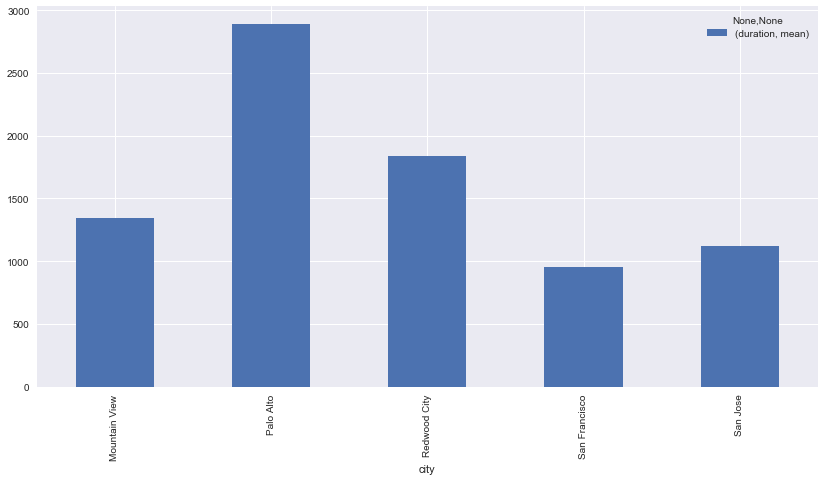

In [23]:
trips_by_city = trips.loc[:,['start_station_id','duration']].tail(80000)
trips_by_city.columns = ['id','duration']
trips_by_city = pd.merge(trips_by_city,stations,on='id',how='inner')
trips_by_city.loc[:,['duration','city']].groupby('city').agg([np.mean]).plot(kind='bar',figsize=(14,7))

In [10]:
palo_alto = trips_by_city.loc[trips_by_city.city == 'Palo Alto',:]
palo_alto.describe()

,id,duration,lat,long,dock_count
count,841.000000,841.000000,841.000000,841.000000,841.000000
mean,35.543401,2887.313912,37.440992,-122.157327,15.960761
std,1.400113,8166.573190,0.007919,0.009849,5.196119
min,34.000000,66.000000,37.425684,-122.164759,11.000000
25%,34.000000,293.000000,37.443988,-122.164759,11.000000
50%,35.000000,870.000000,37.443988,-122.163093,15.000000
75%,37.000000,2085.000000,37.444521,-122.159504,23.000000
max,38.000000,82287.000000,37.448598,-122.137777,23.000000


In [11]:
weather = weather.loc[:,['date','mean_temperature_f']].groupby('date').mean()

In [12]:
weather = pd.DataFrame(weather.to_records())

In [13]:
weather.date = pd.to_datetime(weather.date)

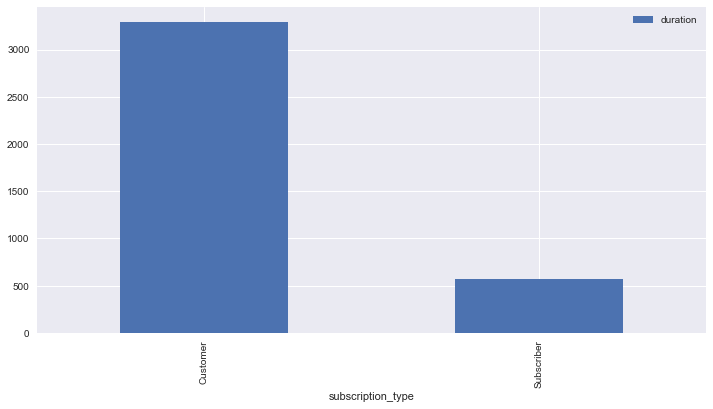

In [22]:
trips.loc[:,['duration','subscription_type']].groupby('subscription_type').mean().plot(kind='bar',figsize=(12,6))

In [17]:
duration_by_hour = trips.loc[:,['start_date','duration']]

In [18]:
duration_by_hour.start_date = pd.to_datetime(duration_by_hour.start_date)

In [19]:
duration_by_hour['hour'] = duration_by_hour.start_date.apply(lambda x: x.hour)

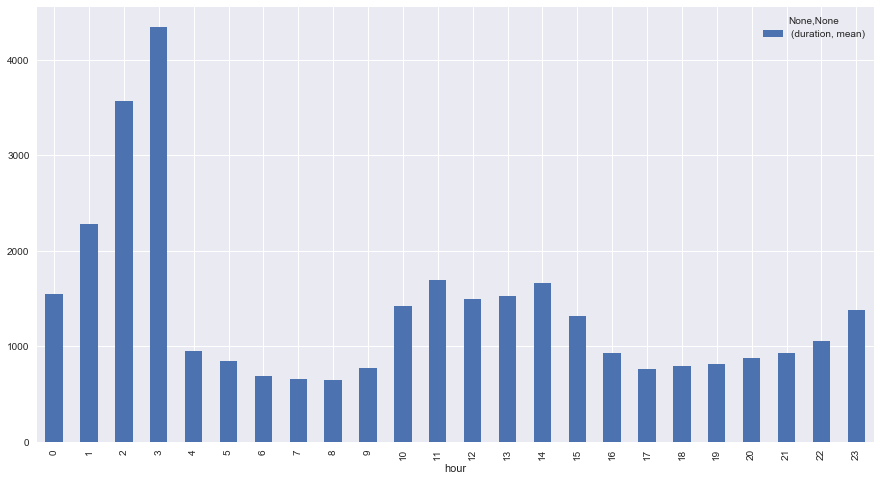

In [20]:
duration_by_hour.loc[:,['duration','hour']].groupby('hour').agg([np.mean]).head(80000).plot(kind='bar',figsize=(15,8))